## Base de datos



Una base de datos es una recopilación organizada de información o datos estructurados, que normalmente se almacena de forma electrónica en un sistema informático. Normalmente, una base de datos está controlada por un sistema de gestión de bases de datos (DBMS). En conjunto, los datos y el DBMS, junto con las aplicaciones asociadas a ellos, reciben el nombre de sistema de bases de datos, abreviado normalmente a simplemente base de datos.

Los datos de los tipos más comunes de bases de datos en funcionamiento actualmente se suelen utilizar como estructuras de filas y columnas en una serie de tablas para aumentar la eficacia del procesamiento y la consulta de datos. Así, se puede acceder, gestionar, modificar, actualizar, controlar y organizar fácilmente los datos. La mayoría de las bases de datos utilizan un lenguaje de consulta estructurada (SQL) para escribir y consultar datos.

https://www.oracle.com/mx/database/what-is-database/

SQLite es un sistema de gestión de bases de datos relacional, permite tener una base de datos en un archivo y poder realizar consultas.

## Conectar python con una Base de Datos SQLite

In [2]:
import sqlite3 as sql
import pandas as pd
import numpy as np

### Prueba de conexión

In [3]:
try:
    sqliteConnection = sql.connect('../data/001_raw/temixco.sqlite')
    cursor = sqliteConnection.cursor()
    print("Database created and Successfully Connected to SQLite")

    sqlite_select_Query = "select sqlite_version();"
    cursor.execute(sqlite_select_Query)
    record = cursor.fetchall()
    print("SQLite Database Version is: ", record)
    cursor.close()

except sql.Error as error:
    print("Error while connecting to sqlite", error)
finally:
    if sqliteConnection:
        sqliteConnection.close()
        print("The SQLite connection is closed")

Database created and Successfully Connected to SQLite
SQLite Database Version is:  [('3.36.0',)]
The SQLite connection is closed


In [4]:
conecta = sql.connect("../data/001_raw/temixco.sqlite")

### Explorando las tablas de la base de datos

In [5]:
cursor = conecta.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('temixco',)]


### Consultando datos de una tabla

In [6]:
consulta = """SELECT * FROM  temixco """
dfDatosTemixco = pd.read_sql_query(consulta,con=conecta)

In [7]:
dfDatosTemixco

,time,Ib,Ig,To,RH,WS,WD,P
0,2018-01-01 00:00:00,,,18.7,36.34,1.422,316.0,87864.11
1,2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2,2018-01-01 00:20:00,0.17,0.0,18.94,35.43,1.565,326.0,87888.64
3,2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
4,2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.90999999999
...,...,...,...,...,...,...,...,...
52555,2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32
52556,2018-12-31 23:20:00,0.0,0.0,18.26,48.02,1.703,320.5,87470.7
52557,2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03
52558,2018-12-31 23:40:00,0.17,0.0,17.99,47.85,1.528,358.8,87470.02


In [8]:
dfDatosTemixco.set_index("time",inplace = True)

In [9]:
dfDatosTemixco.index = pd.to_datetime(dfDatosTemixco.index)

In [10]:
dfDatosTemixco

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,,,18.7,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.17,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.90999999999
...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,1.703,320.5,87470.7
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03


### Consultando el encabezado del df

In [11]:
dfDatosTemixco.head()

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,,,18.7,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.17,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.90999999999


In [12]:
dfDatosTemixco.columns

Index(['Ib', 'Ig', 'To', 'RH', 'WS', 'WD', 'P'], dtype='object')

In [13]:
print(dfDatosTemixco.replace(r'^\s*$', np.nan, regex=True))

                        Ib   Ig     To     RH     WS     WD                  P
time                                                                          
2018-01-01 00:00:00    NaN  NaN   18.7  36.34  1.422  316.0           87864.11
2018-01-01 00:10:00  0.002  0.0  18.95  35.29  1.008  283.7           87876.37
2018-01-01 00:20:00   0.17  0.0  18.94  35.43  1.565  326.0           87888.64
2018-01-01 00:30:00  0.371  0.0  18.77  35.89  2.175  354.5           87887.21
2018-01-01 00:40:00  0.305  0.0  18.81  36.34  1.902  348.0  87886.90999999999
...                    ...  ...    ...    ...    ...    ...                ...
2018-12-31 23:10:00  0.125  0.0  18.51  47.29  1.715  332.2           87484.32
2018-12-31 23:20:00    0.0  0.0  18.26  48.02  1.703  320.5            87470.7
2018-12-31 23:30:00  0.044  0.0  18.39  46.84  2.887  335.7           87455.03
2018-12-31 23:40:00   0.17  0.0  17.99  47.85  1.528  358.8           87470.02
2018-12-31 23:50:00  0.003  0.0  17.75  49.65  0.598

In [14]:
#Reemplazado vacíos por NAN
dfDatosTemixco=dfDatosTemixco.replace(r'^\s*$', np.nan, regex=True)

In [15]:
#Asignando tipo de dato numérico a las columnas
dfDatosTemixco['Ib']=dfDatosTemixco['Ib'].astype(float)
dfDatosTemixco['Ig']=dfDatosTemixco['Ig'].astype(float)
dfDatosTemixco['To']=dfDatosTemixco['To'].astype(float)
dfDatosTemixco['RH']=dfDatosTemixco['RH'].astype(float)
dfDatosTemixco['WS']=dfDatosTemixco['WS'].astype(float)
dfDatosTemixco['WD']=dfDatosTemixco['WD'].astype(float)
dfDatosTemixco['P']=dfDatosTemixco['P'].astype(float)

In [16]:
dfDatosTemixco.dtypes

Ib    float64
Ig    float64
To    float64
RH    float64
WS    float64
WD    float64
P     float64
dtype: object

<AxesSubplot:xlabel='time'>

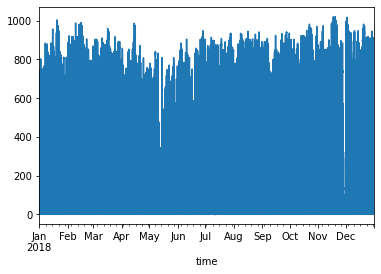

In [17]:
dfDatosTemixco["Ib"].plot()

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

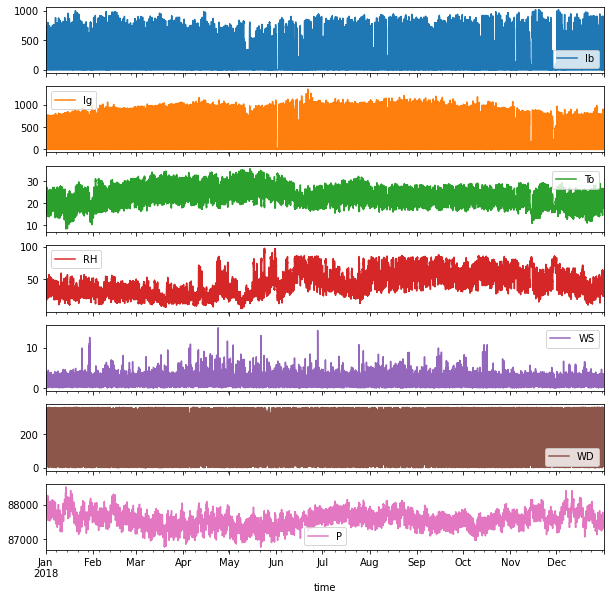

In [18]:
dfDatosTemixco.plot(subplots=True,figsize=(10,10))